# 5.A) Análise de Sobrevivência $t_0 = golo1$ 

In [1]:
# directoria de trabalho
setwd('');
# chamar pacotes survival, DBI (para ligar base-de-dados), ggplot2 (graficos)
library(survival);
library(DBI);
library(ggplot2);
library(plyr);
library(IRdisplay);

In [14]:
color_pallete_function <- colorRampPalette(
  colors = c("black","red","green3","blue" ,"cyan","orange"),
  space = "Lab");
num_colors=6;
colors <- color_pallete_function(num_colors);

In [2]:
#ligar a base de dados foot.db
foot <- dbConnect(RSQLite::SQLite(), "foot.db")

EVENTO de INTERESSE: sec_goal &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     => 2.º golo do jogo ($t_0=0$)

EVENTO de INTERESSE: sec_goal_home => 2.º golo do jogo quando marcado pela equipa "casa" ($t_0=0$)

EVENTO de INTERESSE: sec_goal_away => 2.º golo do jogo quando marcado pela equipa "fora" ($t_0=0$)

recolher dados

In [4]:
sec_goal <- dbGetQuery(foot, 'select id, diff, cens, liga, equip from goal_2');
sec_goal_home <- dbGetQuery(foot, 'select id, diff, (cens+equip)%2 as cens,
liga from goal_2');
sec_goal_away <- dbGetQuery(foot, 'select id, diff, (cens+equip)/2 as cens,
liga from goal_2');
dbDisconnect(foot);
rm(foot);

# EKM 2.º golo jogo t_0=t_golo1

In [5]:
temp <- sec_goal$diff;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", 
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));

In [6]:
ekm<-survfit(Surv(temp, cens) ~ liga);
quantile(ekm)$quantile;

25 50 75
liga=1 13 27 50
liga=2 10 23 45
liga=3 10 22 41
liga=4 11 24 44
liga=5 12 27 49
liga=6 11 24 45

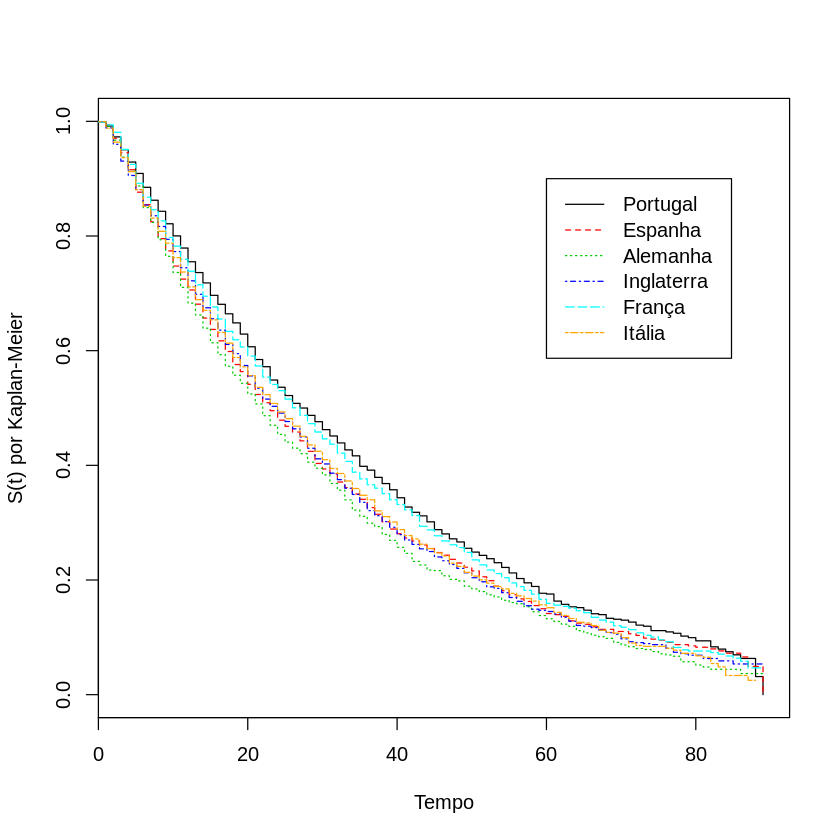

In [8]:
plot(ekm, lty=c(1,2,3,4,5,6), xlab="Tempo", 
     ylab="S(t) por Kaplan-Meier", col=colors);
legend(60,0.90,lty=c(1,2,3,4,5,6),
       c("Portugal","Espanha","Alemanha",
         "Inglaterra","França","Itália"),col=colors);

# EKM 2.º golo jogo marcado por equipa de casa com t_0=t_golo1

In [9]:
temp <- sec_goal_home$diff;
cens <- sec_goal_home$cens;
ligas <- factor(sec_goal_home$liga);
# reatribuir valores para liga
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", 
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));

In [10]:
ekm<-survfit(Surv(temp, cens) ~ liga);
quantile(ekm)$quantile;

25 50 75
liga=1 18 40 65
liga=2 15 34 62
liga=3 16 34 61
liga=4 17 35 60
liga=5 16 38 61
liga=6 16 37 62

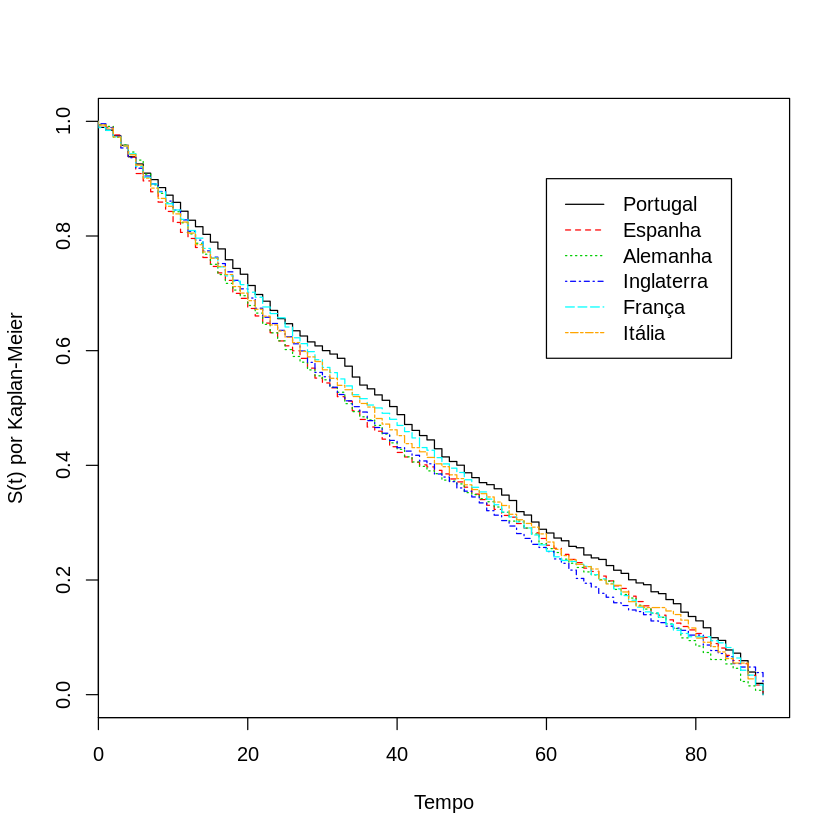

In [11]:
plot(ekm, lty=c(1,2,3,4,5,6), xlab="Tempo", 
     ylab="S(t) por Kaplan-Meier", col=colors);
legend(60,0.90,lty=c(1,2,3,4,5,6),
       c("Portugal","Espanha","Alemanha",
         "Inglaterra","França","Itália"),col=colors);

# EKM 2.º golo jogo marcado por equipa de fora com t_0=t_golo1

In [12]:
temp <- sec_goal_away$diff;
cens <- sec_goal_away$cens;
ligas <- factor(sec_goal_away$liga);
# reatribuir valores para liga
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", 
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));

In [13]:
ekm<-survfit(Surv(temp, cens) ~ liga);
quantile(ekm)$quantile;

25 50 75
liga=1 28 57 NA
liga=2 24 53 NA
liga=3 21 47 NA
liga=4 22 49 NA
liga=5 27 57 NA
liga=6 24 49 84

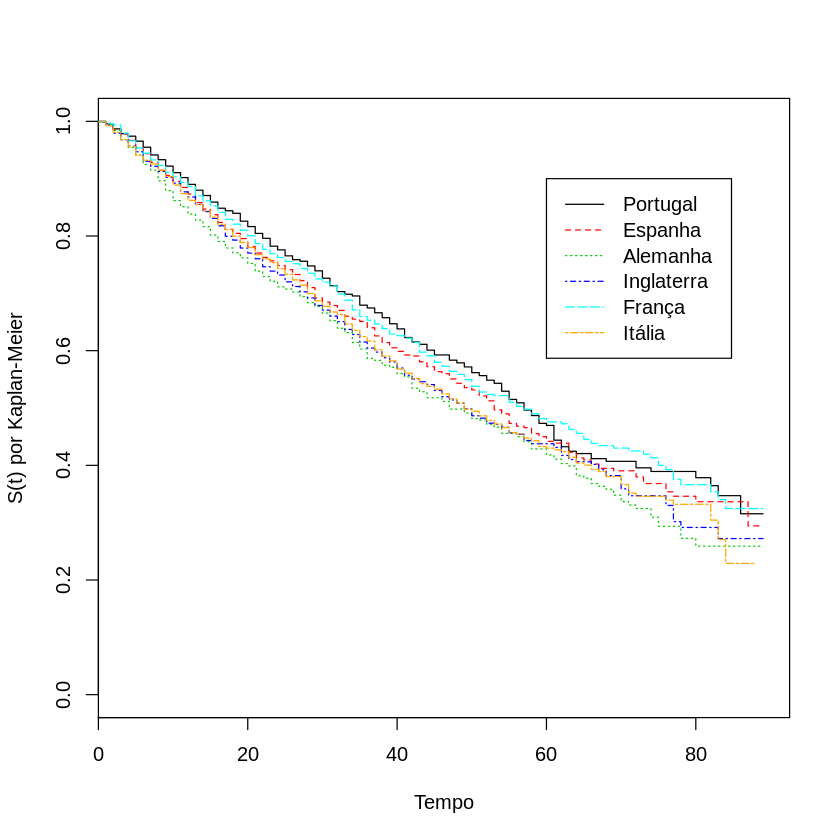

In [14]:
plot(ekm, lty=c(1,2,3,4,5,6), xlab="Tempo", 
     ylab="S(t) por Kaplan-Meier", col=colors);
legend(60,0.90,lty=c(1,2,3,4,5,6),
       c("Portugal","Espanha","Alemanha",
         "Inglaterra","França","Itália"),col=colors);

# Modelo de Cox - 2.º Golo do Jogo com t_0=t_golo1

In [67]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql = 'select id, diff, cens, equip, liga, odds from goal_2';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$diff;
cens <- sec_goal$cens;
equip <- factor(sec_goal$equip);
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));
odds <- as.numeric(sec_goal$odds);
fit <- coxph(Surv(temp, cens) ~ equip + liga + odds, 
             method="breslow");

In [68]:
fit2 <- survfit(Surv(temp,cens) ~ liga);
quantile(fit2)$quantile;

25 50 75
liga=1 13 27 50
liga=2 10 23 45
liga=3 10 22 41
liga=4 11 24 44
liga=5 12 27 49
liga=6 11 24 45

In [69]:
summary(fit);

Call:
coxph(formula = Surv(temp, cens) ~ equip + liga + odds, method = "breslow")

  n= 9258, number of events= 7391 

            coef exp(coef)  se(coef)      z Pr(>|z|)    
equip1 -0.145381  0.864693  0.023604 -6.159 7.31e-10 ***
liga2   0.137456  1.147351  0.042488  3.235 0.001216 ** 
liga3   0.212341  1.236570  0.043976  4.829 1.38e-06 ***
liga4   0.143053  1.153791  0.042573  3.360 0.000779 ***
liga5   0.049934  1.051202  0.042925  1.163 0.244712    
liga6   0.136543  1.146304  0.042285  3.229 0.001242 ** 
odds    0.004659  1.004670  0.005757  0.809 0.418351    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

       exp(coef) exp(-coef) lower .95 upper .95
equip1    0.8647     1.1565    0.8256    0.9056
liga2     1.1474     0.8716    1.0557    1.2470
liga3     1.2366     0.8087    1.1345    1.3479
liga4     1.1538     0.8667    1.0614    1.2542
liga5     1.0512     0.9513    0.9664    1.1435
liga6     1.1463     0.8724    1.0551    1.2454
odds      1.0047     

In [70]:
rsch <- resid(fit, type="scaledsch")
summary(rsch)

       V1                V2                 V3                V4          
 Min.   :-3.3688   Min.   :-8.18670   Min.   :-7.8693   Min.   :-8.58769  
 1st Qu.:-1.8616   1st Qu.: 0.02999   1st Qu.: 0.0665   1st Qu.:-0.01827  
 Median :-1.7484   Median : 0.12083   Median : 0.1866   Median : 0.10562  
 Mean   :-0.1454   Mean   : 0.13746   Mean   : 0.2123   Mean   : 0.14305  
 3rd Qu.: 2.1873   3rd Qu.: 0.28579   3rd Qu.: 0.3617   3rd Qu.: 0.37802  
 Max.   : 2.4576   Max.   : 7.30059   Max.   : 8.1156   Max.   : 6.68749  
       V5                 V6                 V7           
 Min.   :-8.06555   Min.   :-7.95563   Min.   :-0.537769  
 1st Qu.:-0.16024   1st Qu.:-0.04476   1st Qu.:-0.258509  
 Median :-0.04119   Median : 0.07898   Median :-0.139141  
 Mean   : 0.04993   Mean   : 0.13654   Mean   : 0.004659  
 3rd Qu.: 0.36266   3rd Qu.: 0.43746   3rd Qu.: 0.037191  
 Max.   : 8.11557   Max.   : 7.11234   Max.   : 5.622513  

            rho  chisq        p
equip1 -0.01845  2.436 0.118580
liga2  -0.02620  5.082 0.024177
liga3  -0.01726  2.202 0.137799
liga4  -0.01471  1.601 0.205781
liga5  -0.00752  0.419 0.517450
liga6  -0.01123  0.935 0.333669
odds   -0.04043 13.174 0.000284
GLOBAL       NA 23.152 0.001604

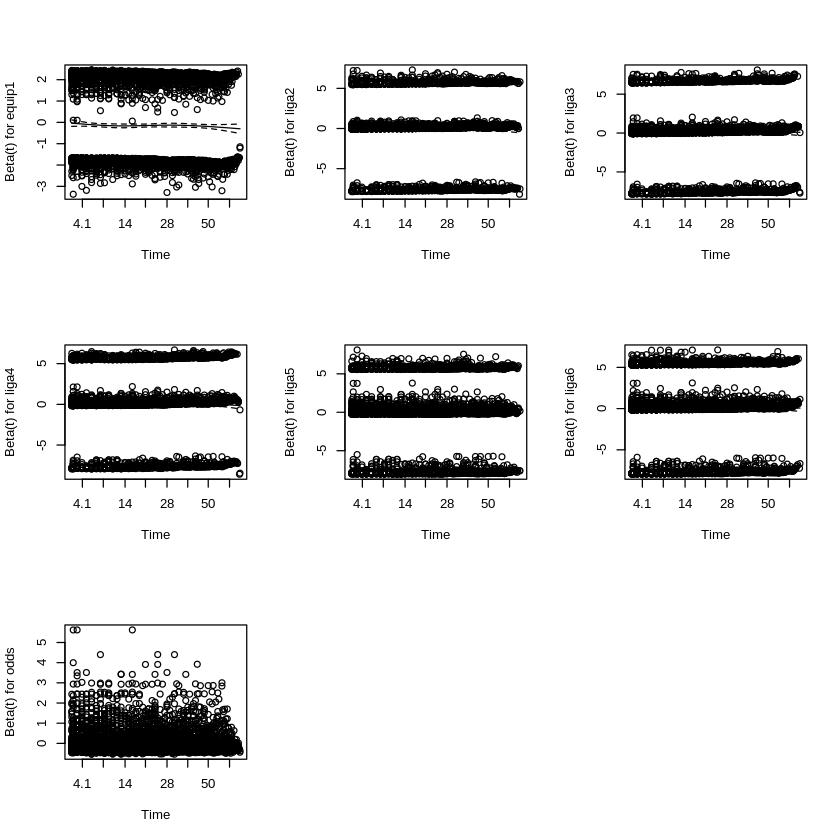

In [71]:
cox.zph(fit, transform="identity")
par(mfrow=c(3, 3))
plot(cox.zph(fit))

#### 5.4.2. Análise de Sobrevivência para 2.º Golo do Jogo com $t_0$=1.º Golo - selecção de variáveis

<strong>com valor-p para odds=0.418351 retirar esta variável e calcular TRV</strong>

In [ ]:
#modelo no. 2: sem var=odds
fit2 <- coxph(Surv(temp, cens) ~ equip + liga, method="breslow");
summary(fit2);

In [ ]:
TRV <- 2*(fit$loglik[2]-fit2$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

##### Como TRV > p-value então existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (reject null)

PARAR PROCESSO DE SELEÇÃO DE VARIÁVEIS => usar modelo inicial com odds


In [ ]:
summary(fit)$coefficients;

In [ ]:
htc <- basehaz(fit, centered=F)
tempo <- htc$time
H0 <- htc$hazard
S0 <- exp(-H0)
S_liga1_casa <- S0^exp(fit$coefficients[7]) #odds=1
S_liga1_fora <- S0^exp(fit$coefficients[7] + fit$coefficients[1]) #odds=1
plot(tempo, S_liga1_casa, lty=1, type="l", xlab="Tempo (minutos)",
     ylab="S(t|x)")
lines(c(0, tempo), c(1, S_liga1_fora), lty=2)
legend(1, 0.4, lty=c(1, 2), c("Casa", "Fora"))

In [ ]:
htc <- basehaz(fit, centered=F)
tempo <- htc$time
H0 <- htc$hazard
S0 <- exp(-H0)
S_liga1_casa <- S0^exp(fit$coefficients[7]) #odds=1
S_liga2_casa <- S0^exp(fit$coefficients[7] + fit$coefficients[2]) #odds=1
S_liga3_casa <- S0^exp(fit$coefficients[7] + fit$coefficients[3]) #odds=1
S_liga4_casa <- S0^exp(fit$coefficients[7] + fit$coefficients[4]) #odds=1
S_liga6_casa <- S0^exp(fit$coefficients[7] + fit$coefficients[6]) #odds=1
plot(tempo, S_liga1_casa, lty=1, type="l", xlab="Tempo (minutos)", 
     ylab="S(t|x)", col=colors[1])
lines(c(0, tempo), c(1, S_liga2_casa), lty=2, col=colors[2])
lines(c(0, tempo), c(1, S_liga3_casa), lty=3, col=colors[3])
lines(c(0, tempo), c(1, S_liga4_casa), lty=4, col=colors[4])
lines(c(0, tempo), c(1, S_liga6_casa), lty=6, col=colors[6])
legend(1, 0.4, lty=c(1, 2, 3, 4, 5, 6), 
       c("Portugal","Espanha","Alemanha","Inglaterra","Itália"),
       col=colors);

In [ ]:
Ht<-basehaz(fit,centered=F);
l0=(Ht[2:dim(Ht)[1],1]-Ht[1:dim(Ht)[1]-1,1])/(Ht[2:dim(Ht)[1],2]-Ht[1:dim(Ht)[1]-1,2]);
plot(tempo[1:length(tempo)-1],l0,lty=1,type="l",
     xlim=range(c(0,max(tempo))),xlab="Tempo em minutos",
     ylab="Taxa de Falha");

In [ ]:
surv2 <- survfit(fit);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos", 
     ylab="Taxa de Falha Acumulada");

## 5.5.1) Modelo de Cox 1-0 => 2-0 $t_0=golo1$

In [2]:
#modelo 1-0_2-0
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql = 'select id, diff, (cens+equip)%2 as cens, liga, 
odds from goal_2'
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$diff;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2",
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3",
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5",
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
odds <- as.numeric(sec_goal$odds);

In [3]:
fit <- survfit(Surv(temp,cens) ~ liga);
quantile(fit)$quantile;

25 50 75
liga=1 18 40 65
liga=2 15 34 62
liga=3 16 34 61
liga=4 17 35 60
liga=5 16 38 61
liga=6 16 37 62

In [4]:
fit_10_20 <- coxph(Surv(temp, cens) ~ liga + odds, 
                   method="breslow");
summary(fit_10_20);

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 9258, number of events= 5218 

          coef exp(coef) se(coef)       z Pr(>|z|)    
liga2  0.08270   1.08621  0.04992   1.657   0.0976 .  
liga3  0.09263   1.09705  0.05261   1.760   0.0783 .  
liga4  0.09447   1.09908  0.05018   1.883   0.0598 .  
liga5  0.01156   1.01162  0.04984   0.232   0.8167    
liga6  0.03954   1.04033  0.05003   0.790   0.4294    
odds  -0.19353   0.82405  0.01170 -16.536   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
liga2     1.086     0.9206    0.9850    1.1979
liga3     1.097     0.9115    0.9896    1.2162
liga4     1.099     0.9099    0.9961    1.2127
liga5     1.012     0.9885    0.9175    1.1154
liga6     1.040     0.9612    0.9432    1.1475
odds      0.824     1.2135    0.8054    0.8432

Concordance= 0.591  (se = 0.005 )
Rsquare= 0.041   (max possible= 1 )
Likelihood ratio test= 391.8  on 6 d

## RETIRAR ligas=5

In [5]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="1", "22"="1", "23"="1", "24"="1", "25"="1", 
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
fit_10_20_B <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_10_20$loglik[2]-fit_10_20_B$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.05378547

[1] 0.3781149

In [6]:
summary(fit_10_20_B)[7]$coefficients;

coef        exp(coef) se(coef)   z           Pr(>|z|)    
liga2  0.07602969 1.078995  0.04074586   1.8659489 6.204851e-02
liga3  0.08595972 1.089762  0.04401509   1.9529602 5.082431e-02
liga4  0.08781229 1.091783  0.04109553   2.1367846 3.261552e-02
liga6  0.03287289 1.033419  0.04089256   0.8038842 4.214638e-01
odds  -0.19360180 0.823986  0.01169628 -16.5524254 1.537806e-61

## RETIRAR ligas=6

In [7]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="1", "22"="1", "23"="1", "24"="1", "25"="1", 
                         "26"="1", "27"="1", "28"="1", "29"="1", "30"="1"));
fit_10_20_C <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_10_20_B$loglik[2]-fit_10_20_C$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.6442642

[1] 0.3781149

In [8]:
summary(fit_10_20_C)[7]$coefficients;

coef        exp(coef) se(coef)   z          Pr(>|z|)    
liga2  0.06423917 1.0663474 0.03795460   1.692527 9.054558e-02
liga3  0.07415203 1.0769705 0.04143705   1.789510 7.353266e-02
liga4  0.07600384 1.0789667 0.03832119   1.983337 4.732979e-02
odds  -0.19362395 0.8239677 0.01169387 -16.557736 1.407920e-61

# retirar ligas=4

In [9]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="1", "17"="1", "18"="1", "19"="1", "20"="1",
                         "21"="1", "22"="1", "23"="1", "24"="1", "25"="1", 
                         "26"="1", "27"="1", "28"="1", "29"="1", "30"="1"));
fit_10_20_D <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_10_20_C$loglik[2]-fit_10_20_D$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 3.886322

[1] 0.3781149

# PARAR PROCESSO
## usar modelo B com ligas=6

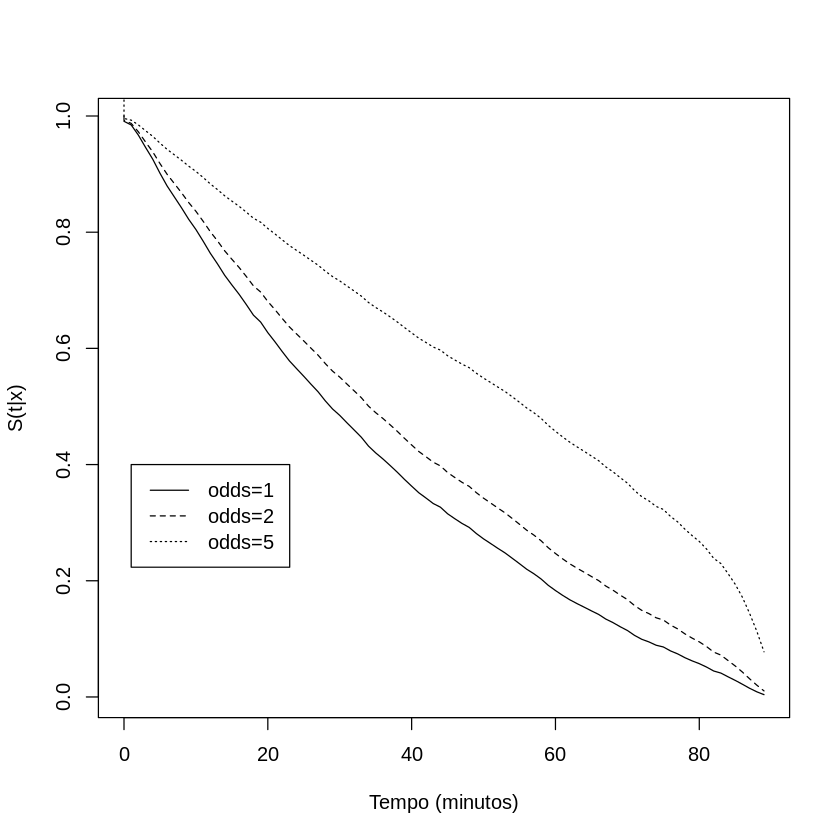

In [35]:
#calculo do risco de base para part=1, liga=1 e odds=1,2,5
betas_10_20 <- fit_10_20_B$coefficients;
ht_10_20 <- basehaz(fit_10_20_B, centered=F);
tempo_0 <- ht_10_20$time
H0_10_20 <- ht_10_20$hazard
S0_10_20 <- exp(-H0_10_20)
S1_10_20 <- S0_10_20^exp(betas_10_20[5])
S2_10_20 <- S0_10_20^exp(betas_10_20[5]*2)
S5_10_20 <- S0_10_20^exp(betas_10_20[5]*5)
plot(tempo_0, S1_10_20, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)")
lines(c(0, tempo_0), c(1, S2_10_20), lty=2)
lines(c(0, tempo_0), c(2, S5_10_20), lty=3)
legend(1, 0.4, lty=c(1, 2, 3), c("odds=1", "odds=2", "odds=5"))

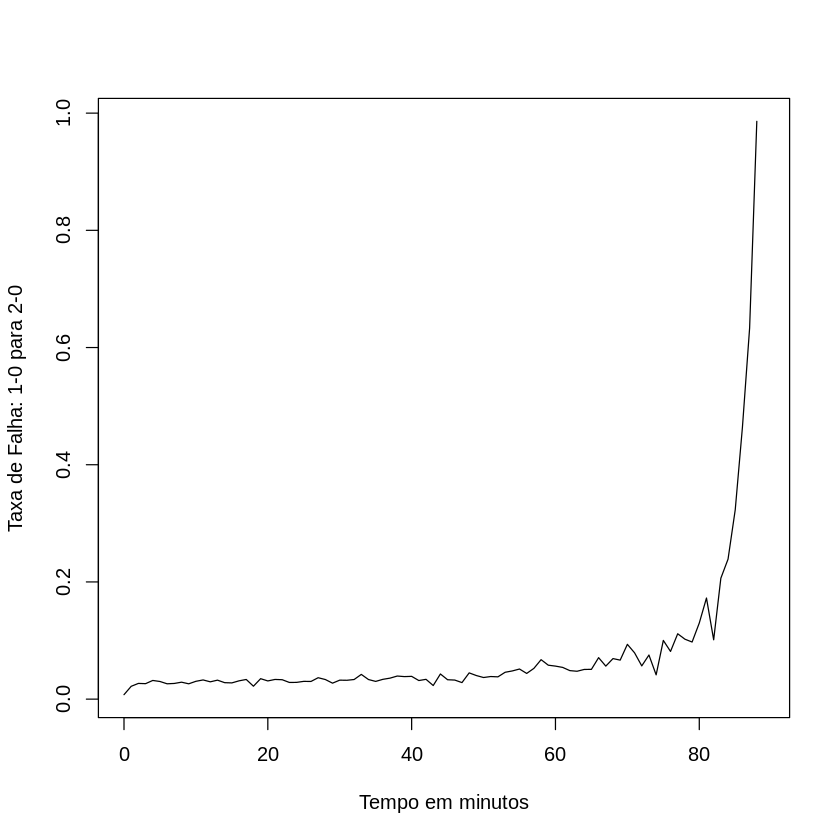

In [36]:
Ht<-basehaz(fit_10_20_B,centered=F)
l0=(Ht[2:dim(Ht)[1],1]-Ht[1:dim(Ht)[1]-1,1])/(Ht[2:dim(Ht)[1],2]-Ht[1:dim(Ht)[1]-1,2])
plot(tempo_0[1:length(tempo_0)-1],l0,lty=1,type="l",
     xlim=range(c(0,max(tempo_0))),xlab="Tempo em minutos",
     ylab="Taxa de Falha: 1-0 para 2-0");

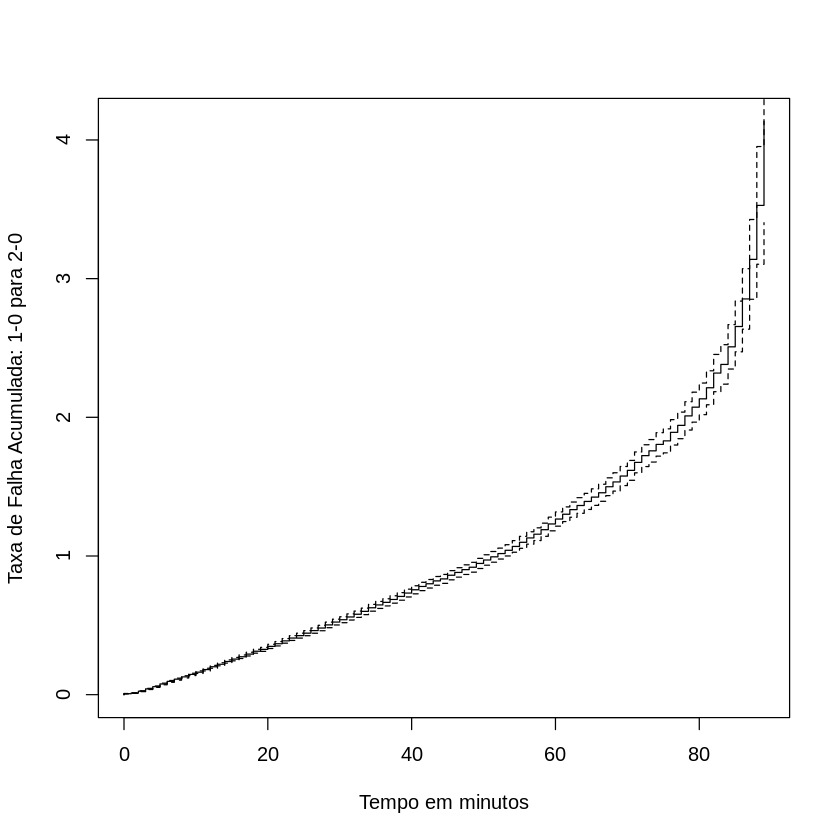

In [31]:
surv2 <- survfit(fit_10_20_B);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos", 
     ylab="Taxa de Falha Acumulada: 1-0 para 2-0");

## 5.5.2) Modelo de Cox 1-0 => 1-1 $t_0=golo1$

In [5]:
#modelo 1-0 para 1-1
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql <- 'select id, diff, 
(((cens+equip)/2 + equip_golo1)%2 + equip)/2 as cens,
liga, odds from goal_2';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$diff;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3",
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5",
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
odds <- as.numeric(sec_goal$odds);

In [33]:
fit2 <- survfit(Surv(temp,cens) ~ liga);
quantile(fit2)$quantile;

25 50 75
liga=1 45 NA NA
liga=2 45 87 NA
liga=3 35 75 NA
liga=4 39 78 NA
liga=5 46 84 NA
liga=6 37 82 NA

In [6]:
fit_10_11 <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
summary(fit_10_11);

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 9258, number of events= 1774 

           coef exp(coef)  se(coef)      z Pr(>|z|)   
liga2  0.029877  1.030327  0.088683  0.337  0.73620   
liga3  0.236432  1.266721  0.089213  2.650  0.00804 **
liga4  0.166374  1.181014  0.086411  1.925  0.05418 . 
liga5 -0.007934  0.992097  0.088518 -0.090  0.92858   
liga6  0.221149  1.247509  0.084750  2.609  0.00907 **
odds  -0.012342  0.987734  0.012410 -0.995  0.31998   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
liga2    1.0303     0.9706    0.8659     1.226
liga3    1.2667     0.7894    1.0635     1.509
liga4    1.1810     0.8467    0.9970     1.399
liga5    0.9921     1.0080    0.8341     1.180
liga6    1.2475     0.8016    1.0566     1.473
odds     0.9877     1.0124    0.9640     1.012

Concordance= 0.529  (se = 0.008 )
Rsquare= 0.002   (max possible= 0.958 )
Likelihood ratio test= 19.74  on

## retirar ligas=5

In [7]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="1", "22"="1", "23"="1", "24"="1", "25"="1", 
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
fit_10_11_B <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_10_11$loglik[2]-fit_10_11_B$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.008032232

[1] 0.3781149

In [8]:
summary(fit_10_11_B)[7]$coefficients;

coef        exp(coef) se(coef)   z          Pr(>|z|)   
liga2  0.03433264 1.0349288 0.07349791  0.4671241 0.640411121
liga3  0.24089171 1.2723832 0.07410830  3.2505363 0.001151875
liga4  0.17083515 1.1862952 0.07069719  2.4164348 0.015673333
liga6  0.22562423 1.2531047 0.06854627  3.2915610 0.000996330
odds  -0.01224933 0.9878254 0.01236805 -0.9904017 0.321977801

# retirar ligas=2

In [9]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="1", "7"="1", "8"="1", "9"="1", "10"="1", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="1", "22"="1", "23"="1", "24"="1", "25"="1", 
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
fit_10_11_C <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_10_11_B$loglik[2]-fit_10_11_C$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.2174721

[1] 0.3781149

In [10]:
summary(fit_10_11_C)[7]$coefficients;

coef       exp(coef) se(coef)   z          Pr(>|z|)    
liga3  0.2288364 1.257136  0.06936211  3.2991558 0.0009697607
liga4  0.1587802 1.172080  0.06570531  2.4165498 0.0156683821
liga6  0.2135834 1.238107  0.06339760  3.3689515 0.0007545471
odds  -0.0121870 0.987887  0.01237520 -0.9847917 0.3247264048

# retirar odds

In [11]:
fit_10_11_D <- coxph(Surv(temp, cens) ~ liga, method="breslow");
TRV <- 2*(fit_10_11_C$loglik[2]-fit_10_11_D$loglik[2])
pvalue <- pchisq(0.95, 1)
TRV
pvalue

[1] 0.9971131

[1] 0.6702807

# PARAR
## modelo final com ligas=3,4,6 e odds

In [12]:
summary(fit_10_11_C)[7]$coefficients;

coef       exp(coef) se(coef)   z          Pr(>|z|)    
liga3  0.2288364 1.257136  0.06936211  3.2991558 0.0009697607
liga4  0.1587802 1.172080  0.06570531  2.4165498 0.0156683821
liga6  0.2135834 1.238107  0.06339760  3.3689515 0.0007545471
odds  -0.0121870 0.987887  0.01237520 -0.9847917 0.3247264048

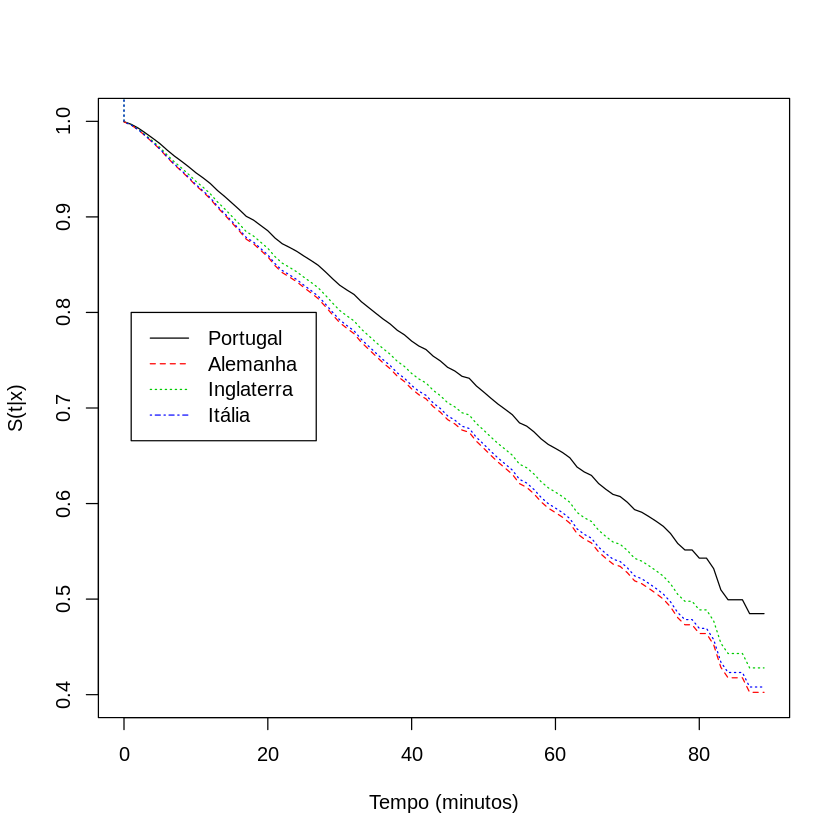

In [15]:
#calculo do risco de base para part=1, liga=1 e odds=1
betas_10_11 <- fit_10_11_C$coefficients
ht_10_11 <- basehaz(fit_10_11_C, centered=F)
tempo_1 <- ht_10_11$time
H0_10_11 <- ht_10_11$hazard
S0_10_11 <- exp(-H0_10_11)
S1_10_11 <- S0_10_11^exp(betas_10_11[4])
S2_10_11 <- S0_10_11^exp(betas_10_11[1]+betas_10_11[4])
S5_10_11 <- S0_10_11^exp(betas_10_11[2]+betas_10_11[4])
S7_10_11 <- S0_10_11^exp(betas_10_11[3]+betas_10_11[4])
plot(tempo_1, S1_10_11, lty=1, type="l", ylim=c(0.4,1), 
     xlab="Tempo (minutos)", ylab="S(t|x)", col=colors)
lines(c(0, tempo_1), c(1, S2_10_11), lty=2, col=colors[2])
lines(c(0, tempo_1), c(2, S5_10_11), lty=3, col=colors[3])
lines(c(0, tempo_1), c(2, S7_10_11), lty=3, col=colors[4])
legend(1, 0.8, lty=c(1, 2, 3,4), c("Portugal", "Alemanha", "Inglaterra", 
                                 "Itália"), col=colors)

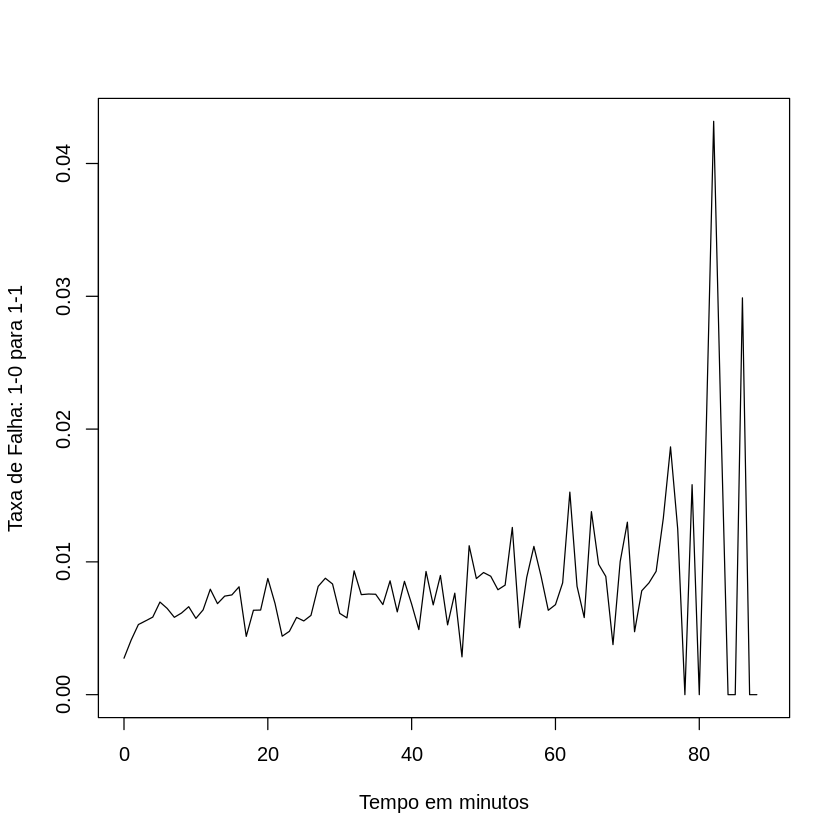

In [16]:
Ht_1<-basehaz(fit_10_11_C,centered=F)
l1=(Ht_1[2:dim(Ht_1)[1],1]-Ht_1[1:dim(Ht_1)[1]-1,1])/(Ht_1[2:dim(Ht_1)[1],2]-Ht_1[1:dim(Ht_1)[1]-1,2])
plot(tempo_1[1:length(tempo_1)-1],l1,lty=1,type="l",
     xlim=range(c(0,max(tempo_1))),xlab="Tempo em minutos",
     ylab="Taxa de Falha: 1-0 para 1-1");

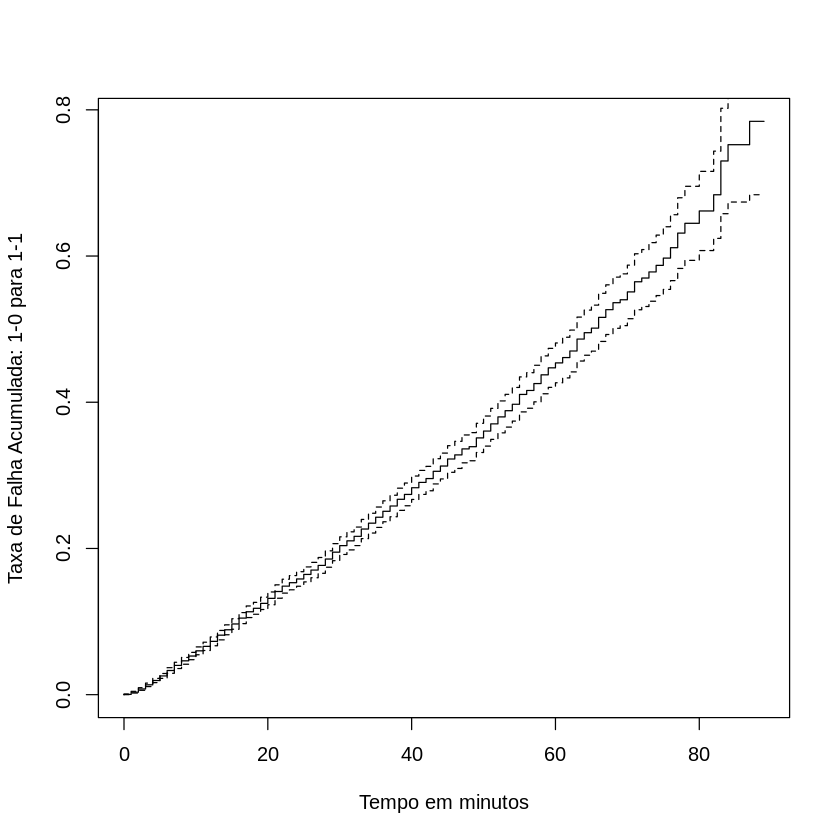

In [17]:
surv2 <- survfit(fit_10_11_C);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos", 
     ylab="Taxa de Falha Acumulada: 1-0 para 1-1");

## 5.5.3) Modelo de Cox 0-1 => 1-1 $t_0=golo1$

In [18]:
#modelo 0-1 para 1-1
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql <- 'select id, diff,
((cens+equip)%2 + equip_golo1)/2 as cens, liga, odds from goal_2';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$diff;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
odds <- as.numeric(sec_goal$odds);
# reatribuir valores para liga diferente
#part <- factor(sec_goal$part);
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2","10"="2",
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3",
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5",
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));

In [49]:
fit2 <- survfit(Surv(temp,cens) ~ liga);
quantile(fit2)$quantile;

25 50 75
liga=1 45 88 NA
liga=2 40 NA NA
liga=3 39 82 NA
liga=4 44 85 NA
liga=5 50 86 NA
liga=6 42 NA NA

In [19]:
fit_01_11 <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
summary(fit_01_11);

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 9258, number of events= 1672 

            coef  exp(coef)   se(coef)      z Pr(>|z|)
liga2  0.0672467  1.0695593  0.0875516  0.768    0.442
liga3  0.1221064  1.1298743  0.0911177  1.340    0.180
liga4  0.0004758  1.0004759  0.0890924  0.005    0.996
liga5  0.0005300  1.0005301  0.0879929  0.006    0.995
liga6  0.0613525  1.0632736  0.0871500  0.704    0.481
odds  -0.0102326  0.9898196  0.0125651 -0.814    0.415

      exp(coef) exp(-coef) lower .95 upper .95
liga2    1.0696     0.9350    0.9009     1.270
liga3    1.1299     0.8851    0.9451     1.351
liga4    1.0005     0.9995    0.8402     1.191
liga5    1.0005     0.9995    0.8420     1.189
liga6    1.0633     0.9405    0.8963     1.261
odds     0.9898     1.0103    0.9657     1.014

Concordance= 0.511  (se = 0.008 )
Rsquare= 0   (max possible= 0.95 )
Likelihood ratio test= 3.99  on 6 df,   p=0.7
Wald test            = 4  on 6 df,   p=0.7
Score (logrank)

# RETIRAR ligas=4

In [20]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2","10"="2",
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3",
                         "16"="1", "17"="1", "18"="1", "19"="1", "20"="1",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5",
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
fit_01_11_B <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_01_11$loglik[2]-fit_01_11_B$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 2.851633e-05

[1] 0.3781149

# PARAR
## usar modelo inicial

In [21]:
summary(fit_01_11)[7]$coefficients;

coef          exp(coef) se(coef)   z            Pr(>|z|) 
liga2  0.0672467353 1.0695593 0.08755164  0.768080838 0.4424392
liga3  0.1221064015 1.1298743 0.09111770  1.340095250 0.1802144
liga4  0.0004757552 1.0004759 0.08909238  0.005340022 0.9957393
liga5  0.0005300003 1.0005301 0.08799292  0.006023216 0.9951942
liga6  0.0613524541 1.0632736 0.08714995  0.703987234 0.4814407
odds  -0.0102325976 0.9898196 0.01256506 -0.814368857 0.4154337

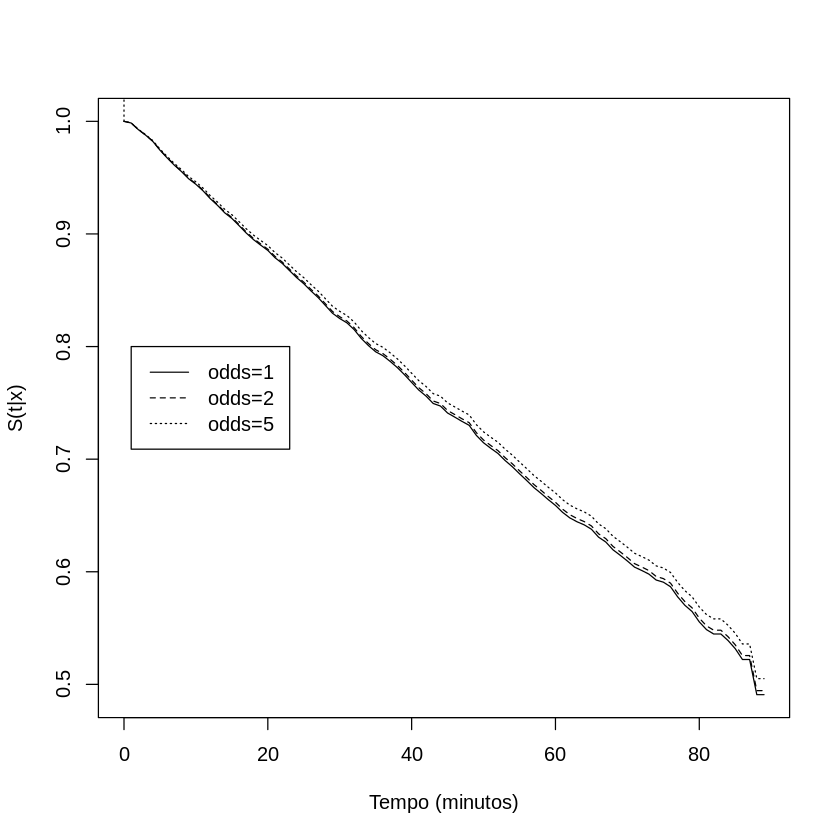

In [23]:
#calculo do risco de base para part=1, liga=1 e odds=1
betas_01_11 <- fit_01_11$coefficients
ht_01_11 <- basehaz(fit_01_11, centered=F);
tempo_3 <- ht_01_11$time;
H0_01_11 <- ht_01_11$hazard;
S0_01_11 <- exp(-H0_01_11);
S1_01_11 <- S0_01_11^exp(betas_01_11[6]);
S2_01_11 <- S0_01_11^exp(betas_01_11[6]*2);
S5_01_11 <- S0_01_11^exp(betas_01_11[6]*5);
plot(tempo_3, S1_01_11, lty=1, type="l", xlab="Tempo (minutos)", 
     ylab="S(t|x)");
lines(c(0, tempo_3), c(1, S2_01_11), lty=2);
lines(c(0, tempo_3), c(2, S5_01_11), lty=3);
legend(1, 0.8, lty=c(1, 2, 3), c("odds=1", "odds=2", "odds=5"));

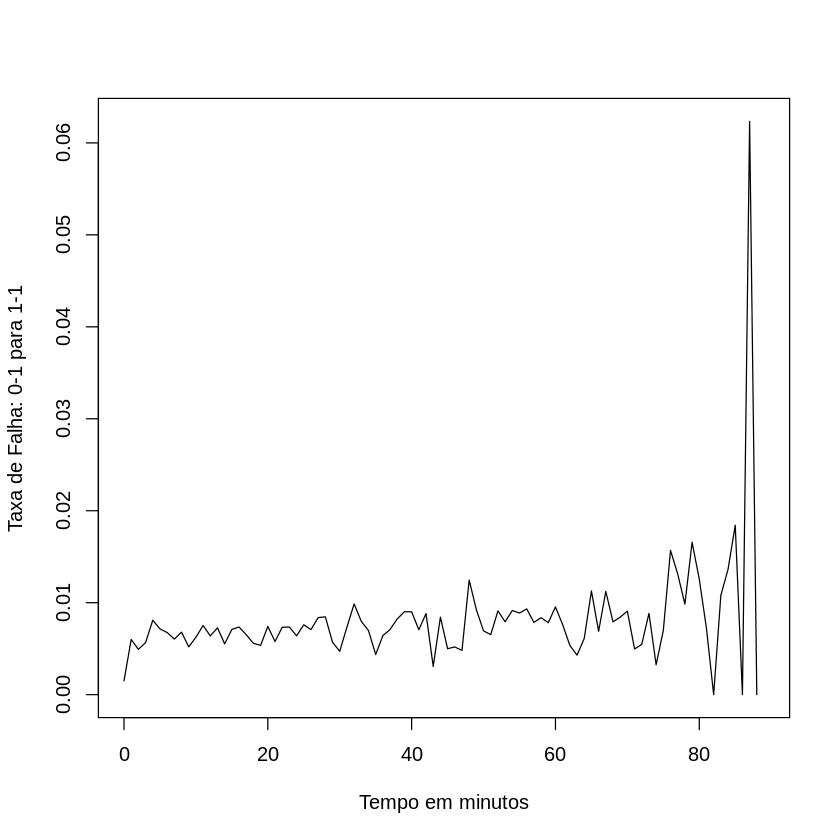

In [24]:
Ht_2<-basehaz(fit_01_11,centered=F)
l3=(Ht_2[2:dim(Ht_2)[1],1]-Ht_2[1:dim(Ht_2)[1]-1,1])/(Ht_2[2:dim(Ht_2)[1],2]-Ht_2[1:dim(Ht_2)[1]-1,2])
plot(tempo_3[1:length(tempo_3)-1],l3,lty=1,type="l",
     xlim=range(c(0,max(tempo_3))),xlab="Tempo em minutos",
     ylab="Taxa de Falha: 0-1 para 1-1");

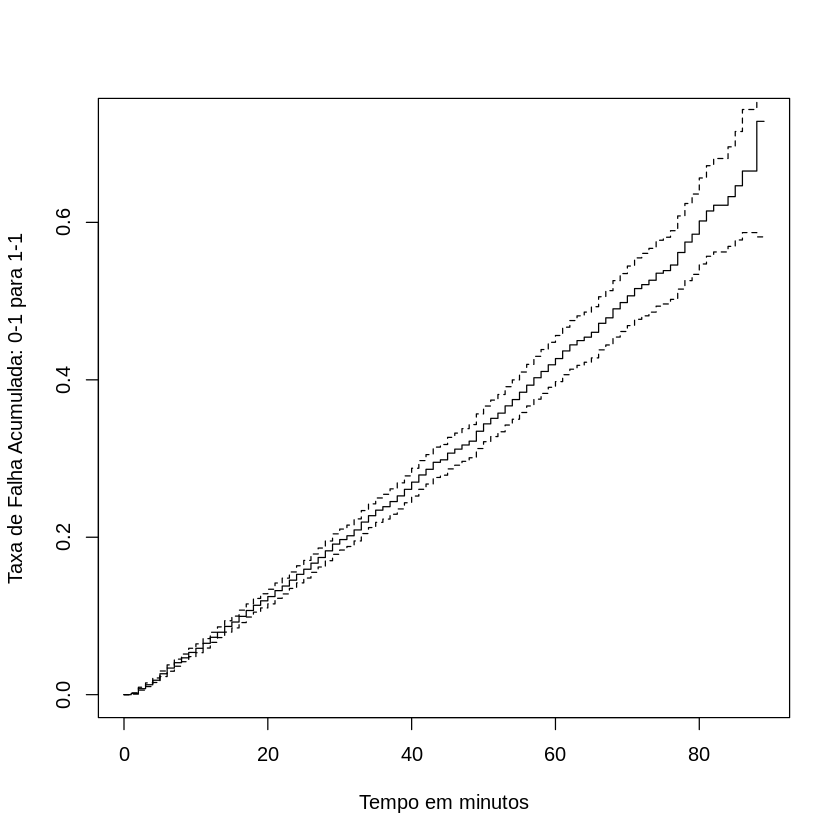

In [25]:
surv2 <- survfit(fit_01_11);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos",
     ylab="Taxa de Falha Acumulada: 0-1 para 1-1");

## 5.5.4) Modelo de Cox 0-1 => 0-2 $t_0=golo1$

In [26]:
#modelo 0-1_0-2
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql <- 'select id, diff, (cens+equip+equip_golo1)/3 as cens,
liga, odds from goal_2';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$diff;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
odds <- as.numeric(sec_goal$odds);
# reatribuir valores para liga diferente
#part <- factor(sec_goal$part);
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));
fit_01_02 <- coxph(Surv(temp, cens) ~ liga + odds,
                   method="breslow");
fit2 <- survfit(Surv(temp,cens) ~ liga);
quantile(fit2)$quantile;

25 50 75
liga=1 59 NA NA
liga=2 47 NA NA
liga=3 42 NA NA
liga=4 45 NA NA
liga=5 52 NA NA
liga=6 52 NA NA

In [58]:
summary(fit_01_02);

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 9258, number of events= 1409 

          coef exp(coef) se(coef)      z Pr(>|z|)    
liga2 0.238989  1.269965 0.097778  2.444 0.014517 *  
liga3 0.368574  1.445671 0.101163  3.643 0.000269 ***
liga4 0.399526  1.491118 0.098680  4.049 5.15e-05 ***
liga5 0.320580  1.377927 0.100901  3.177 0.001487 ** 
liga6 0.320663  1.378041 0.100099  3.203 0.001358 ** 
odds  0.174681  1.190866 0.006694 26.096  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
liga2     1.270     0.7874     1.048     1.538
liga3     1.446     0.6917     1.186     1.763
liga4     1.491     0.6706     1.229     1.809
liga5     1.378     0.7257     1.131     1.679
liga6     1.378     0.7257     1.133     1.677
odds      1.191     0.8397     1.175     1.207

Concordance= 0.689  (se = 0.009 )
Rsquare= 0.049   (max possible= 0.922 )
Likelihood ratio test= 461.2  on 6 df, 

# RETIRAR ligas=2

In [60]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="1", "7"="1", "8"="1", "9"="1","10"="1",
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3",
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5",
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
fit_01_02_B <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_01_02$loglik[2]-fit_01_02_B$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 6.054671

[1] 0.3781149

# PARAR
## usar modelo inicial

In [61]:
summary(fit_01_02)[7]$coefficients

coef      exp(coef) se(coef)    z         Pr(>|z|)     
liga2 0.2389890 1.269965  0.097778099  2.444197  1.451748e-02
liga3 0.3685737 1.445671  0.101162668  3.643376  2.690848e-04
liga4 0.3995264 1.491118  0.098679883  4.048712  5.150028e-05
liga5 0.3205802 1.377927  0.100900863  3.177180  1.487149e-03
liga6 0.3206629 1.378041  0.100099009  3.203457  1.357884e-03
odds  0.1746811 1.190866  0.006693746 26.096157 4.030997e-150

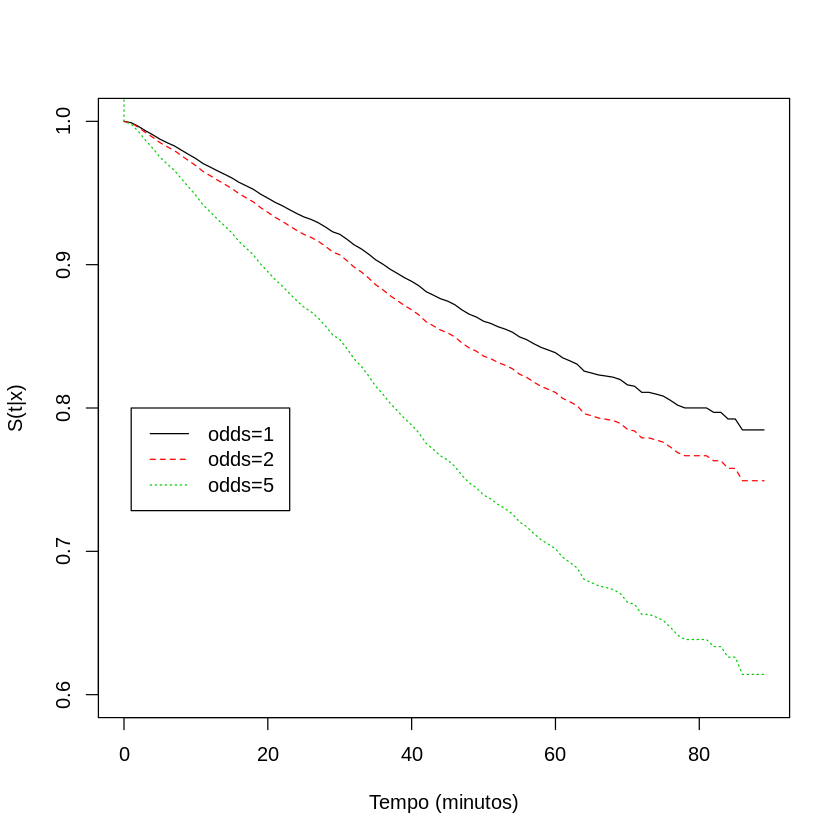

In [27]:
#calculo do risco de base para part=1, liga=1 e odds=1,2,5
betas_01_02 <- fit_01_02$coefficients
ht_01_02 <- basehaz(fit_01_02, centered=F)
tempo_2 <- ht_01_02$time
H0_01_02 <- ht_01_02$hazard
S0_01_02 <- exp(-H0_01_02)
S1_01_02 <- S0_01_02^exp(betas_01_02[6])
S2_01_02 <- S0_01_02^exp(betas_01_02[6]*2)
S5_01_02 <- S0_01_02^exp(betas_01_02[6]*5)
plot(tempo_2, S1_01_02, lty=1, type="l", xlab="Tempo (minutos)",
     ylab="S(t|x)", ylim=c(0.6,1.0), col=colors);
lines(c(0, tempo_2), c(1, S2_01_02), lty=2, col=colors[2])
lines(c(0, tempo_2), c(2, S5_01_02), lty=3, col=colors[3])
legend(1, 0.8, lty=c(1, 2, 3), c("odds=1", "odds=2", "odds=5"),
       col=colors)

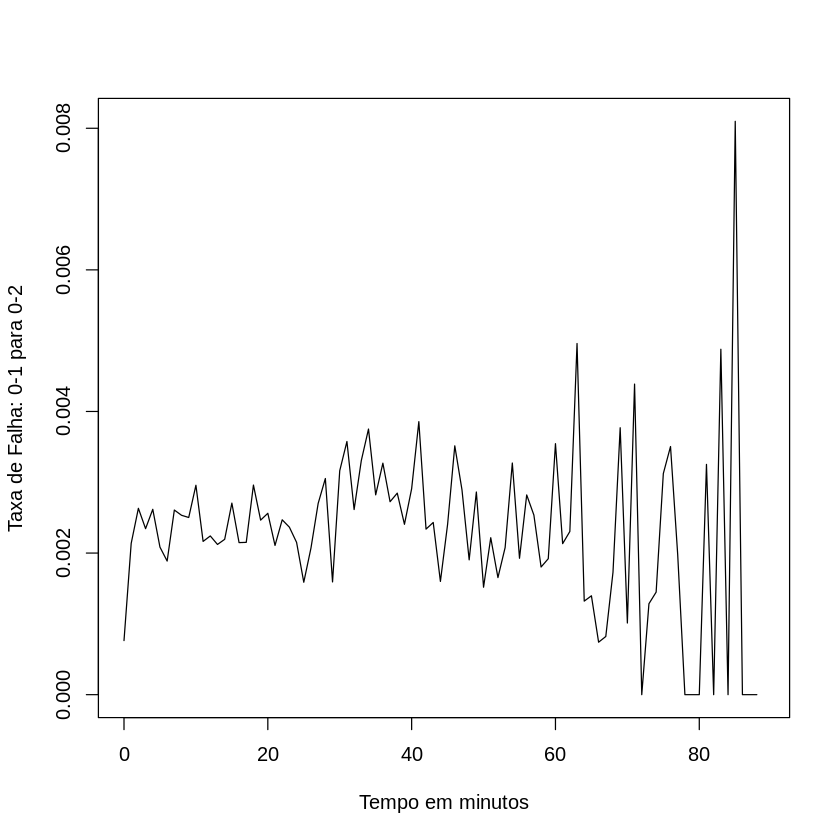

In [28]:
Ht<-basehaz(fit_01_02,centered=F)
l2=(Ht[2:dim(Ht)[1],1]-Ht[1:dim(Ht)[1]-1,1])/(Ht[2:dim(Ht)[1],2]-Ht[1:dim(Ht)[1]-1,2])
plot(tempo_2[1:length(tempo_2)-1],l2,lty=1,type="l",
     xlim=range(c(0,max(tempo_2))),xlab="Tempo em minutos",
     ylab="Taxa de Falha: 0-1 para 0-2");

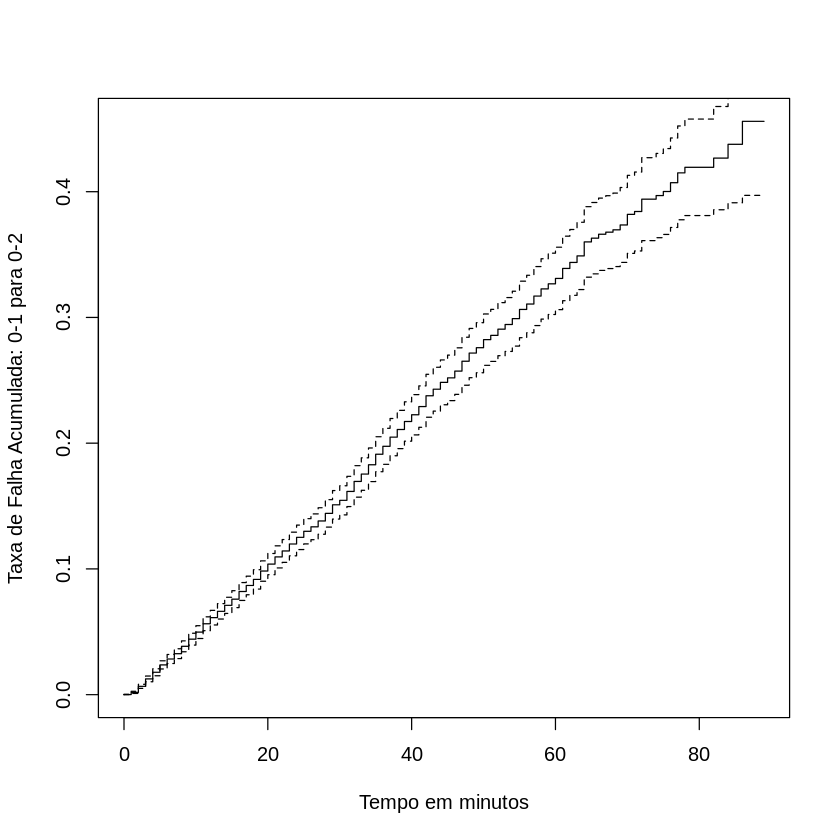

In [64]:
surv2 <- survfit(fit_01_02);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos", 
     ylab="Taxa de Falha Acumulada: 0-1 para 0-2");

## 5.6.1) Comparação de Taxa de Falha 1-0 para 2-0 vs. 1-0 para 1-1

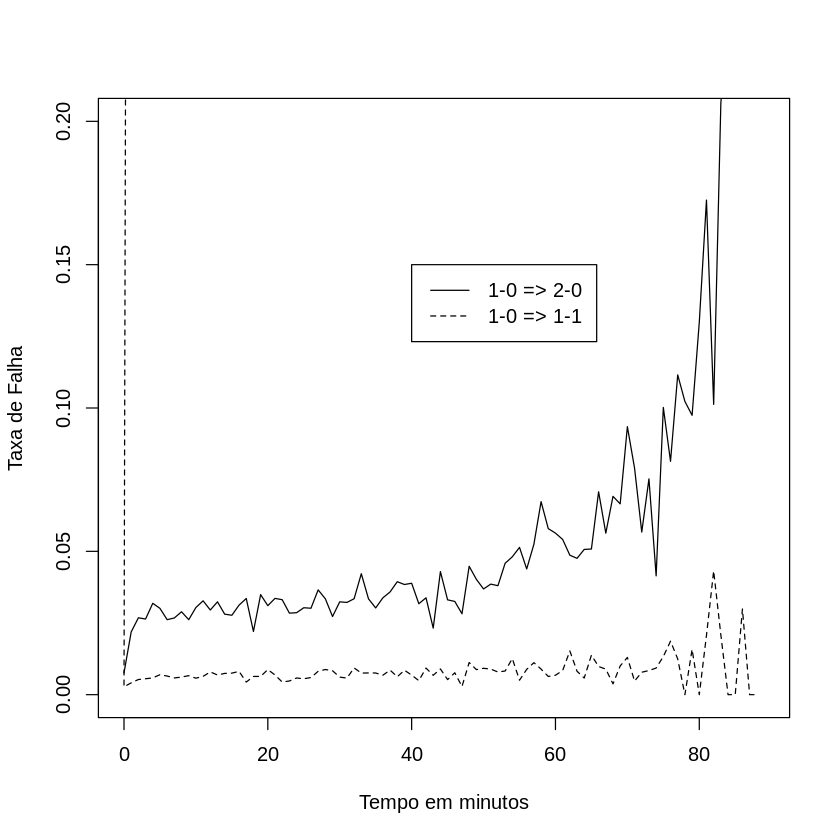

In [37]:
plot(tempo_0[1:length(tempo_0)-1], l0, lty=1,type="l",
     xlim=range(c(0,max(tempo_0))),xlab="Tempo em minutos",
     ylim=c(0,0.2),ylab="Taxa de Falha");
lines(c(1, tempo_1[1:length(tempo_1)-1]), c(1, l1), lty=2)
legend(40, 0.15, lty=c(1, 2), c("1-0 => 2-0", "1-0 => 1-1"));

## 5.6.2) Comparação de Taxa de Falha 0-1 para 0-2 vs. 0-1 para 1-1

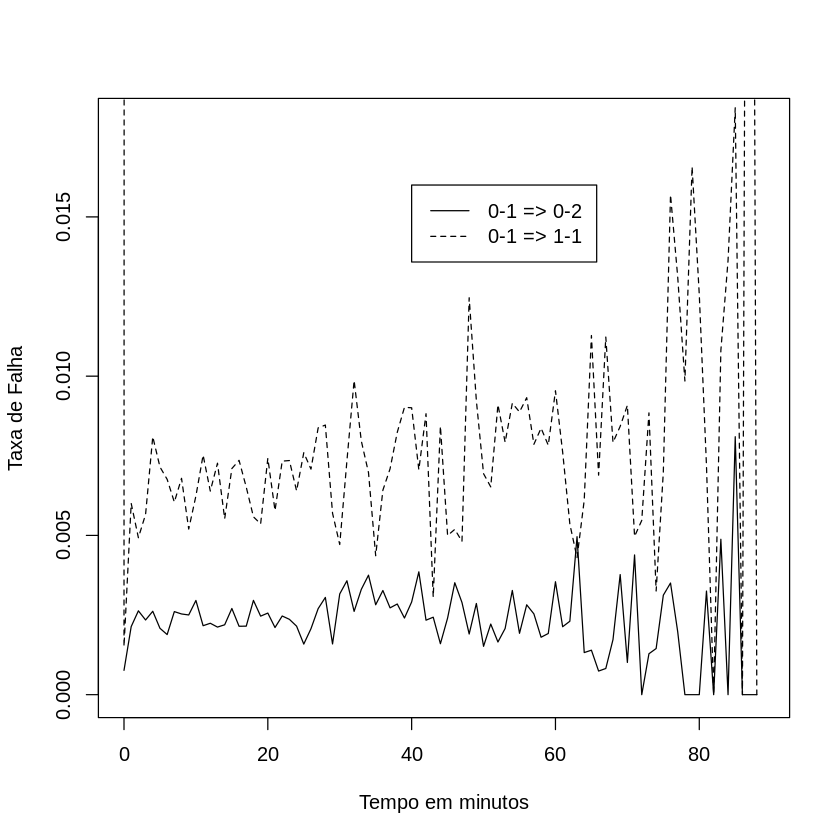

In [30]:
plot(tempo_2[1:length(tempo_2)-1], l2, lty=1,type="l",
     xlim=range(c(0,max(tempo_3))),xlab="Tempo em minutos",
     ylim=range(c(0,0.018)), ylab="Taxa de Falha");
lines(c(1, tempo_3[1:length(tempo_3)-1]), c(1, l3), lty=2)
legend(40, 0.016, lty=c(1, 2), c("0-1 => 0-2", "0-1 => 1-1"));